In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Carregar arquivo para um dataframe
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [51]:
# Visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [52]:
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [53]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [54]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [55]:
df_exames.head(5)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [56]:
# Converter uma variável categórica em numérica, usando One-Hot Encoding

# df_exames = pd.get_dummies(df_exames, columns=['genero'])
# Isso irá transformar a variável em Boolean porém neste caso queremos que seja to tipo numérica

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [57]:
df_exames.head(5)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


<Axes: >

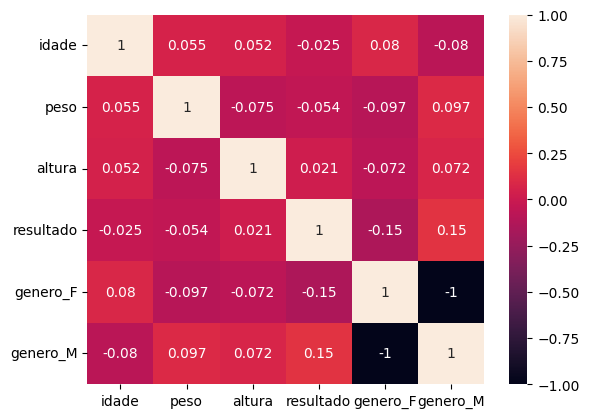

In [58]:
# Apresentar mapa de calor com correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

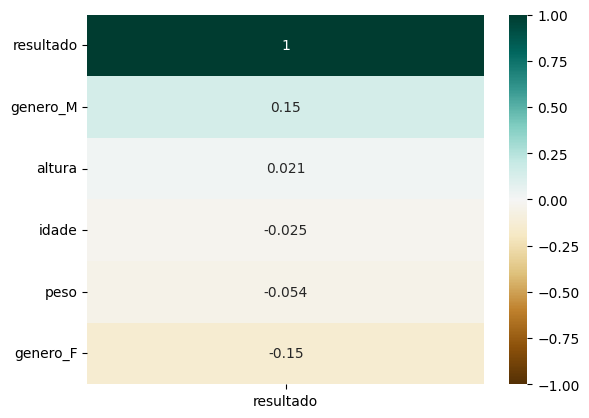

In [59]:
# Mapa de correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


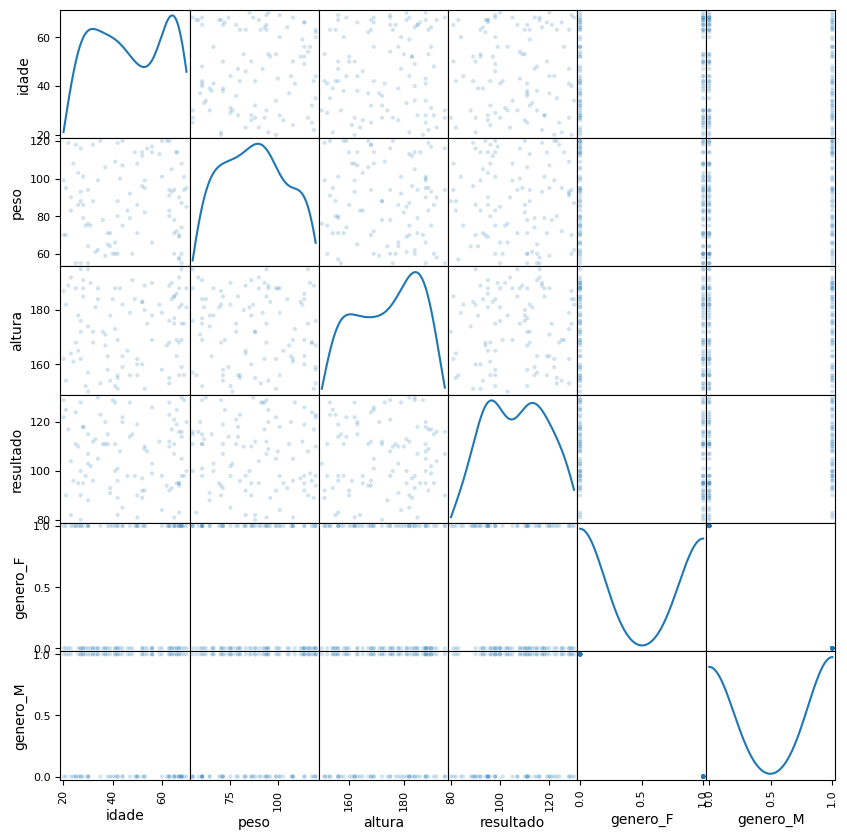

In [60]:
# Scatter plot (dispersão) com distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(10, 10), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

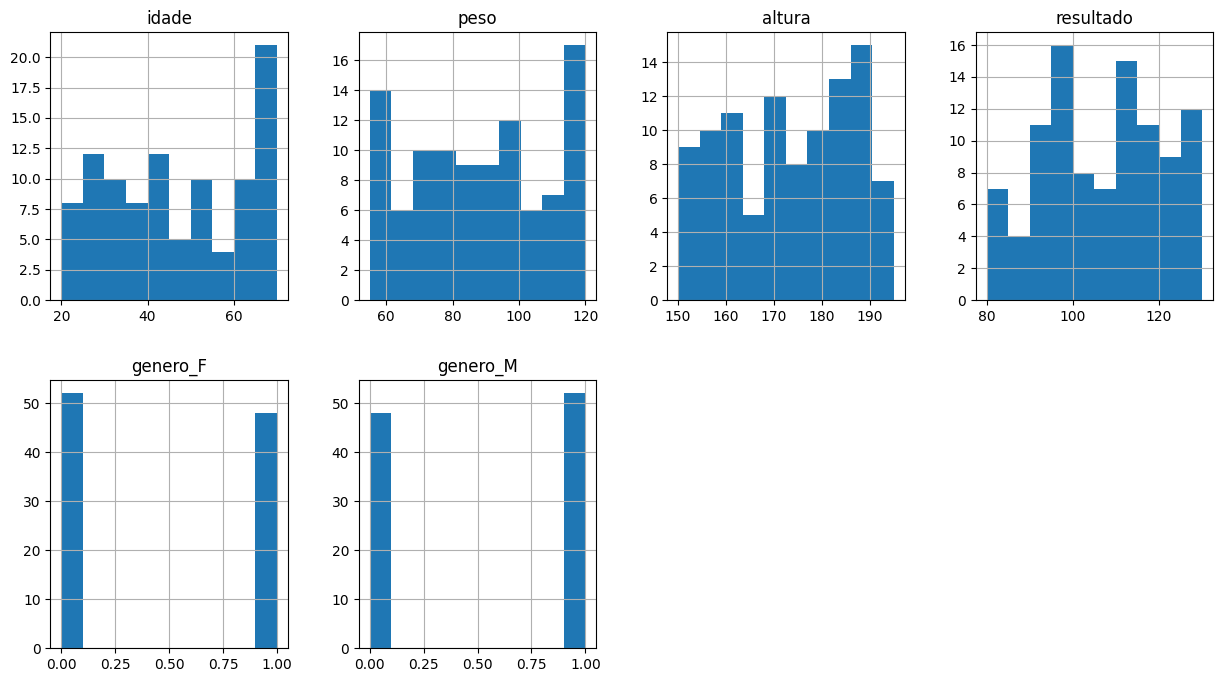

In [61]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(15,8))

### Criar uma nova features para testar uma correlação

In [62]:
# IMC (índice de massa corporal) - peso (kg) / altura² (m)

df_exames['imc'] = df_exames['peso'] / ((df_exames['altura'] / 100) **2)

In [63]:
df_exames.head(5)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


In [64]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [65]:
dict_reg= {
    'tempo_casa': [1, 3, 6, 9, 10, 14, 18],
    'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]
}

In [66]:
df_reg_simples = pd.DataFrame.from_dict(dict_reg)

<Axes: xlabel='tempo_casa', ylabel='salario'>

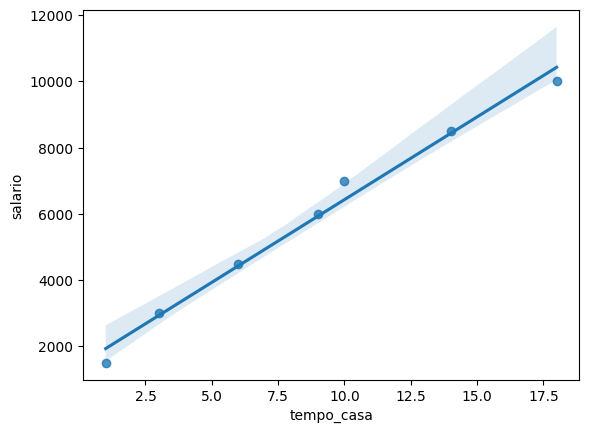

In [67]:
sns.regplot(data=df_reg_simples, x='tempo_casa', y='salario')

```
# Equação da reta
y = ax + b
```

In [68]:
# Importando bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

### Modelo 1 - SEM IMC

In [69]:
# X representa os valores que dependentes, o que o modelo vai usar para prever o resultado
X = df_exames.drop(columns=['imc', 'resultado'])
# y representa o resultado, a variável que o modelo vai prever
y = df_exames['resultado']

In [70]:
# Dividir o conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [71]:
len(X_train)

70

In [72]:
len(X_test)

30

In [73]:
y_test

71     92
43    103
11    115
83    112
78    126
19    116
80     81
4     100
79    120
75    110
72    100
44    130
46    102
90     97
56    123
2      93
47    123
51    116
0      98
97    125
65     93
12    111
32    107
82    128
66     96
14     80
81    119
91    113
15     91
74    128
Name: resultado, dtype: int64

In [74]:
# Treinando o modelo (algoritmo) de Regressão Linear - Modelo 1
print("Treinando o modelo - Linear Regression...")
linear_reg = LinearRegression().fit(X_train, y_train)

Treinando o modelo - Linear Regression...


In [75]:
# Gerar predições do conjunto de testes com base no modelo treinado
y_pred = linear_reg.predict(X_test)

In [76]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [77]:
# Equação da Reta - Regressão Linear => (y = a + bx)

# Valores de "a"
linear_reg.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [78]:
# Valor de "b"
linear_reg.intercept_

np.float64(94.21133142019876)

### Métricas para o modelo - Linear Regression

In [ ]:
# R2 Score - conjunto de treinamento
linear_reg.score(X_train, y_train)

0.06218388634297234

In [80]:
# R2 Score - conjunto de testes
linear_reg.score(X_test, y_test)

-0.13640904479106397

In [ ]:
# R2 Scores - Testes
r2_score(y_test, y_pred)

-0.13640904479106397

In [82]:
# MAE (Mean Absolute Error) - Erro médio absoluto
mean_absolute_error(y_test, y_pred)

12.695569181179541

### Modelo 2 - Apenas IMC

In [83]:
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [84]:
# Dividir o conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [85]:
# Treinar o modelo
print("Treinando o modelo...")
lin_reg = LinearRegression().fit(X_train, y_train)

Treinando o modelo...


In [86]:
# Gerar predição com base no modelo para o conjunto de testes
y_pred = lin_reg.predict(X_test)

In [87]:
y_pred

array([102.73796795, 107.63459815, 108.58489716, 105.70201829,
       103.49767627, 108.73954738, 106.19637687, 108.30118863,
       107.77627304, 106.26623629, 108.10220438, 108.18040704,
       107.64653815, 104.90037915, 101.0377542 , 105.66044363,
       104.93184853, 109.01470939, 105.54141413, 103.46672578,
       105.42716889, 108.77686903, 107.65316149, 104.46837648,
       105.02409479, 105.70201829, 102.84895739, 108.11389027,
       107.77143433, 103.72326007])

In [88]:
lin_reg.coef_

array([-0.21677589])

In [89]:
lin_reg.intercept_

np.float64(112.15019229088837)

In [90]:
# R2 Score - conjunto de treinamento
lin_reg.score(X_train, y_train)

0.015285962664806862

In [91]:
# R2 Score - conjunto de teste
lin_reg.score(X_test, y_test)

-0.08898328562401758

In [92]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.5056514070601

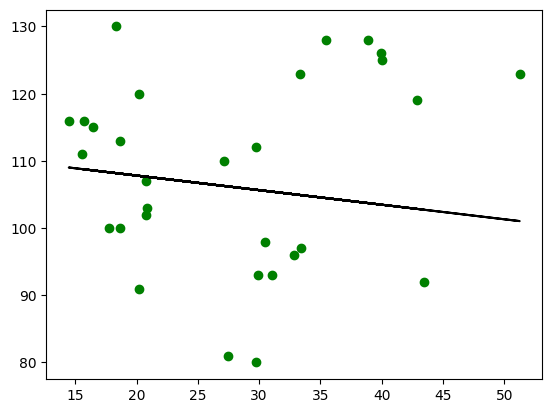

In [94]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')